# Exploratory Data Analysis

Exploratory Data Analysis is an essential preparatory phase in developing a Retrieval-Augmented Generation (RAG) system. Conducting thorough EDA ensures data integrity and model compatibility, thereby enhancing the overall reliability of downstream processes such as tokenization, embedding, and indexing. Here’s a structured breakdown of EDA in the context of this project, detailing the role of each analytical step and proposing specific coding experiments to solidify data understanding.

This EDA phase will establish a foundation for informed decision-making in the next step; RAG pipeline, by ensuring that data characteristics align with model requirements. By rigorously analyzing and understanding the dataset, we can proceed to tokenization, vectorization, and indexing with confidence, setting up the RAG system for optimal performance in terms of retrieval accuracy, relevance, and response quality.

## 1. Imports & Data

In [1]:
# Data Manipulation and Basic Operations
import pandas as pd
import numpy as np

# Text Quality Analysis
import re
import textstat
from langdetect import detect, DetectorFactory
import nltk
from nltk.corpus import stopwords

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenization and Embedding
from transformers import BertTokenizer, BertModel  # Example with BERT tokenizer and model
from sentence_transformers import SentenceTransformer  # For Sentence-BERT

# Outlier Detection and Text Length Analysis
from scipy.stats import zscore  # For statistical outlier detection if needed

# Miscellaneous NLP Libraries
from langdetect import detect, detect_langs  # To check language consistency
from sklearn.feature_extraction.text import TfidfVectorizer  # For vectorizing if you want a quick test

Load the cleaned data from the our data preprocessing pipeline notebook.

In [2]:
data = pd.read_csv("../data/processed/cleantech_processed.csv")
data.head()

,title,date,content,domain,url
0,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,Qatar Petroleum (QP) is targeting aggressive c...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,India Launches Its First 700 MW PHWR,2021-01-15,Nuclear Power Corp of India Ltd (NPCIL) synchr...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,New Chapter for US-China Energy Trade,2021-01-20,New US President Joe Biden took office this we...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,The slow pace of Japanese reactor restarts con...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,Two of New York City's largest pension funds s...,energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


## 2. Experiments

### 2.1 Identifying Sources of Error

Rigorous identification of potential errors in the dataset is crucial for mitigating future issues. Common error sources in text data - such as residual noise, inconsistencies and outliers can affect the quality of embeddings and, subsequently, the retrieval accuracy.

#### 2.1.1 Text Quality Analysis

- **Experiment:** Implement a text quality check to identify and quantify spelling inconsistencies, punctuation errors, and non-standard characters. Use a Python library like textstat to assess readability scores, or nltk and langdetect for verifying language consistency.

- **Goal:** Standardize the quality of textual data to ensure uniformity across embeddings and to prevent retrieval misalignments due to noise.

#### 2.1.2 Outlier Detection

- **Experiment:** Calculate text length distributions and apply statistical thresholds (e.g., texts with word counts or token counts outside the 95th percentile) to detect unusually short or long documents.

- **Goal:** Determine an optimal range for token limits, preventing exceedingly short or lengthy content from distorting the embedding and retrieval process.

### 2.2 Building Data Understanding

Understanding data distribution and structure is pivotal for optimizing chunking, tokenization, and embedding. This involves analyzing the language style, terminology, and length to select an embedding model that aligns with the content’s properties.

#### 2.2.1 Text Length Distribution

- **Experiment:** Generate a histogram or box plot to visualize text length distribution. This can be implemented using matplotlib or seaborn to analyze token counts and guide chunking strategies.

- **Goal:** Define the optimal chunk size, informed by length distribution, that balances context coherence with model token limits.

#### 2.2.2 Language and Content Type Consistency

- **Experiment:** Use language detection tools (langdetect, polyglot) to verify language uniformity across the dataset and identify any mixed-language entries. Additionally, sample different sections of the text for terminological consistency, assessing whether the language matches the intended domain-specific jargon.

- **Goal:** Ensure language and content alignment to prevent semantic mismatches in retrieval and to support model consistency in embedding.

#### 2.2.3 Embedding Compatibility

- **Experiment:** Test a small sample of the data with different embeddings (e.g., Sentence-BERT, OpenAI embeddings) to evaluate how well the embeddings capture the semantic context of the text.

- **Goal:** Identify the embedding model best suited to the text’s linguistic and structural properties to maximize retrieval accuracy and relevance.

### 2.3 Identifying Model Requirements
Aligning data characteristics with model constraints and requirements is fundamental to RAG system design. This step ensures that tokenization, chunking, and embedding configurations are tailored to the data’s structure.

#### 2.3.1 Embedding Model Selection:

- **Experiment:** Run sample embeddings using models like BERT, DistilBERT, or multilingual embeddings (if necessary) to assess performance. Analyzing the vector outputs can provide insight into which model captures the nuances of the dataset most effectively.

- **Goal:** Determine the embedding model that aligns with the complexity and language of the text, ensuring efficient vectorization and accurate retrieval.

#### 2.3.2 Chunking Strategy

- **Experiment:** Based on text length analysis, experiment with different chunking sizes and overlap strategies to optimize the context captured within each chunk. Implement a script to split the text dynamically based on length and content structure.

- **Goal:** Identify an optimal chunking approach that maintains contextual relevance without exceeding model token limits, thus enhancing embedding quality and retrieval precision.

# Archive

## Sentiment Analysis

The goal of this step is to quantify the sentiment expressed in the text data, providing a numerical value that reflects whether the sentiment is positive, negative, or neutral (-1.0 indicates a negative sentiment, 1.0 indicates a positive sentiment, and 0 indicates a neutral sentiment).

**Example**

For instance, if content_cleaned has an entry like "This technology is amazing!", the get_sentiment function would return a positive polarity score (e.g., 0.8). Conversely, if the entry is "This technology is terrible!", it might return a negative polarity score (e.g., -0.7). This transformation allows for quantifying and analyzing sentiments in the dataset systematically.

In [5]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'content' column
data['sentiment'] = data['content_cleaned'].apply(get_sentiment)

In [6]:
print(data['sentiment'].describe())

count    9593.000000
mean        0.111761
std         0.061180
min        -0.247789
25%         0.072533
50%         0.108145
75%         0.148359
max         0.458333
Name: sentiment, dtype: float64


We can visualize the sentiment values to help us understand their distribution visually

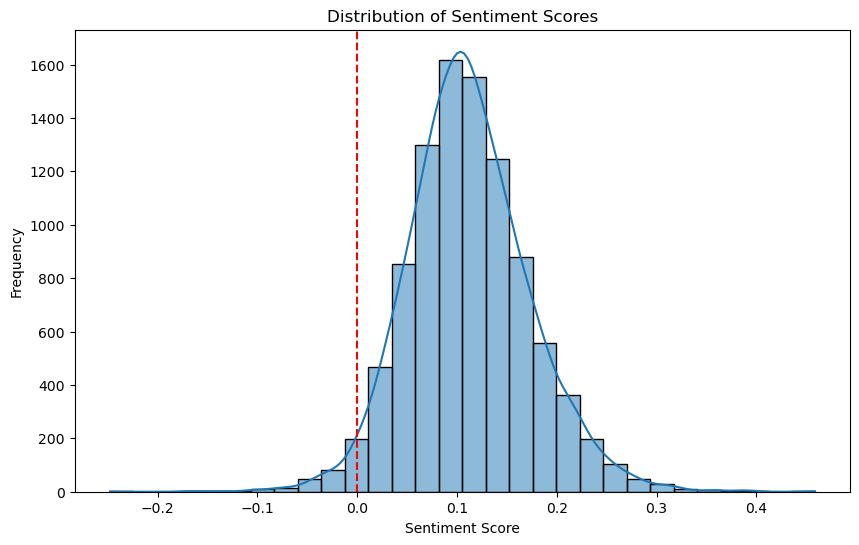

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')  # Indicate neutral sentiment
plt.show()

This histogram shows how many entries have positive, negative or neutral sentiments. The red line indicates the neutral sentiment threshold (0). The histogram looks like a normal distribution, with the mean value being around 0.1. 

We can count how many entries are positive, negative or neutral based on the sentiment scores:

In [8]:
# Classify sentiment
data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the occurrences of each sentiment category
sentiment_counts = data['sentiment_category'].value_counts()
print(sentiment_counts)

sentiment_category
Positive    5382
Neutral     4200
Negative      11
Name: count, dtype: int64


Our dataset contains a date column, so we can analyze how sentiment changes over time

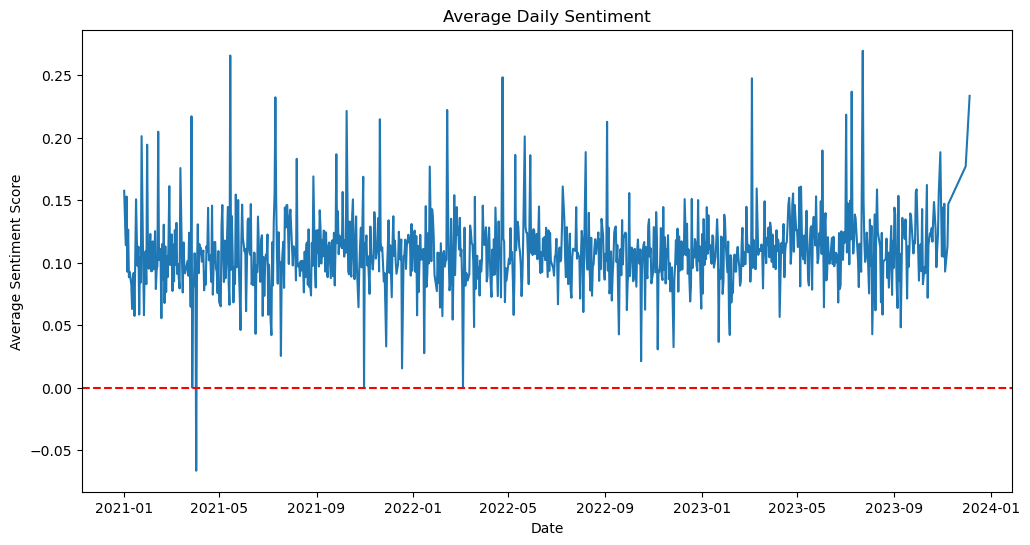

In [9]:
# Convert 'date' column to datetime format if not already done
data['date'] = pd.to_datetime(data['date'])

# Group by date and calculate the average sentiment
daily_sentiment = data.groupby(data['date'].dt.date)['sentiment'].mean()

# Plotting the daily sentiment
plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='red', linestyle='--')  # Indicate neutral sentiment
plt.show()

## Text Summarization

Types of Text Summarization:
- Extractive Summarization: This method selects key sentences or phrases directly from the text to create a summary. It aims to retain important information without altering the original wording. Techniques often include sentence ranking based on features like term frequency, sentence position, or using models like TF-IDF.
- Abstractive Summarization: This approach generates new sentences to convey the main ideas of the text. It requires a deeper understanding of the content and may involve techniques such as paraphrasing and generating new phrases. Models like T5, BART, or GPT are commonly used for this purpose.

In [10]:
data_sample = data["content_cleaned"].head()
data_sample

0    qatar petroleum qp targeting aggressive cuts g...
1    nuclear power corp india ltd npcil synchronize...
2    new us president joe biden took office week us...
3    slow pace japanese reactor restarts continues ...
4    two new york citys largest pension funds say d...
Name: content_cleaned, dtype: object

In [11]:
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization")

/Users/alexanderschilling/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [12]:
def summarize_text(text):
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']

for text in data_sample:
    print(summarize_text(text))

 qatar petroleum qp targeting aggressive cuts greenhouse gas emissions prepares launch phase 2 planned 48 million ton per year lng expansion . Phase 2 planned to raise production capacity 16 million tons per year . Company also plans build 1.6 gigawatts solar energy capacity .
 niw sep.1820 news tweeted anil kakodkar former chairman department atomic energy said 15 units design follow three currently constructionanother kakrapar two rajasthan plant followed two greenfield gorakhpur site haryana planned 10 units . niw dec.1120 inaugural us small modular reactor smr project moved second phase fluor nuscale subsidiary announcing jan 11 per agreements utah associated municipal power systems uamps develop higher maturity cost estimates .
 uschina relationship worst decades energy come play bigger role relationship ever rising chinese imports us oil lng could serve foundation fresh discussions . china part phase 1 trade deal would lift us tariffs chinese products biden november us presidenti

## Explorative Data Analysis

### Content Length

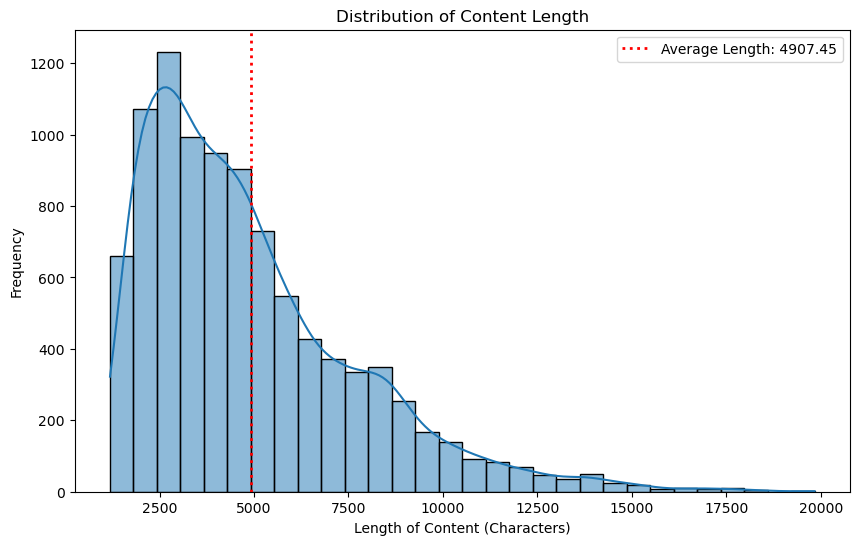

Max:  19836
Min:  1188
Average:  4907.4483477535705


In [20]:
# Add a column for the length of each content
data['content_length'] = data['content'].apply(len)

# Calculate the average content length
average_length = data['content_length'].mean()

# Visualize the distribution of content length
plt.figure(figsize=(10, 6))
sns.histplot(data['content_length'], bins=30, kde=True)
plt.axvline(average_length, color='red', linestyle='dotted', linewidth=2, label=f'Average Length: {average_length:.2f}')
plt.title('Distribution of Content Length')
plt.xlabel('Length of Content (Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Max: ", data['content_length'].max())
print("Min: ", data['content_length'].min())
print("Average: ", average_length)

### Relationship Between Variables

Explore relationships between variables, such as how sentiment scores correlate with content length or publication dates.

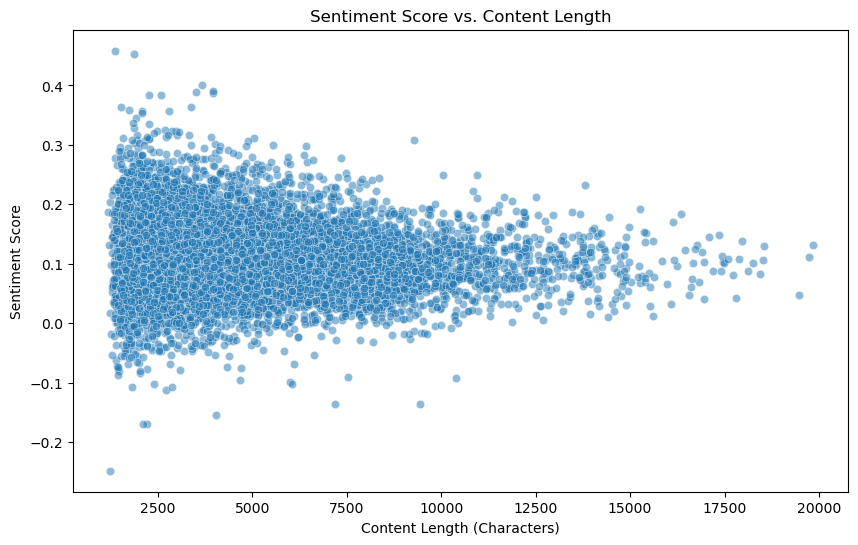

In [15]:
# Scatter plot of sentiment score vs. content length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_length', y='sentiment', data=data, alpha=0.5)
plt.title('Sentiment Score vs. Content Length')
plt.xlabel('Content Length (Characters)')
plt.ylabel('Sentiment Score')
plt.show()

### Articles per domain

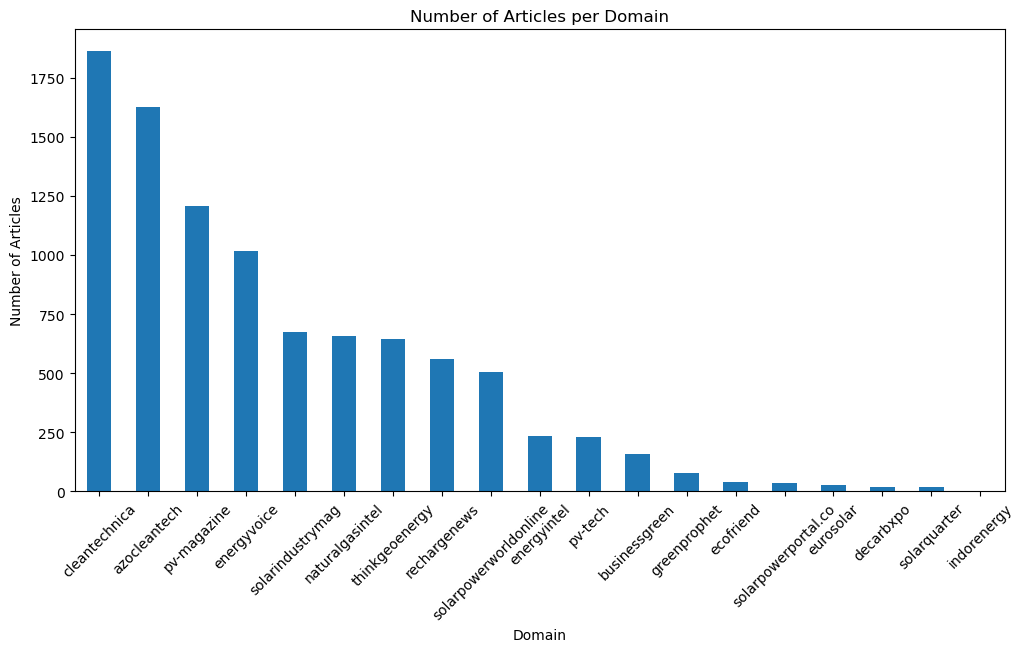

In [18]:
domain_counts = data['domain'].value_counts()

plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar')
plt.title('Number of Articles per Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

### Sentiment by domain

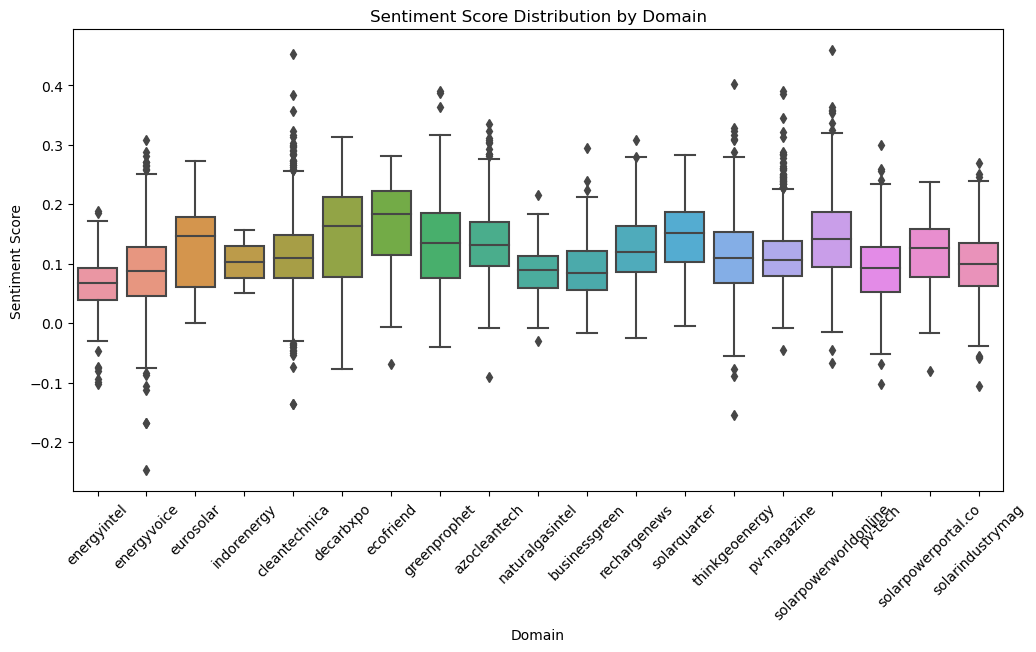

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='domain', y='sentiment', data=data)
plt.title('Sentiment Score Distribution by Domain')
plt.xlabel('Domain')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

### Word Cloud

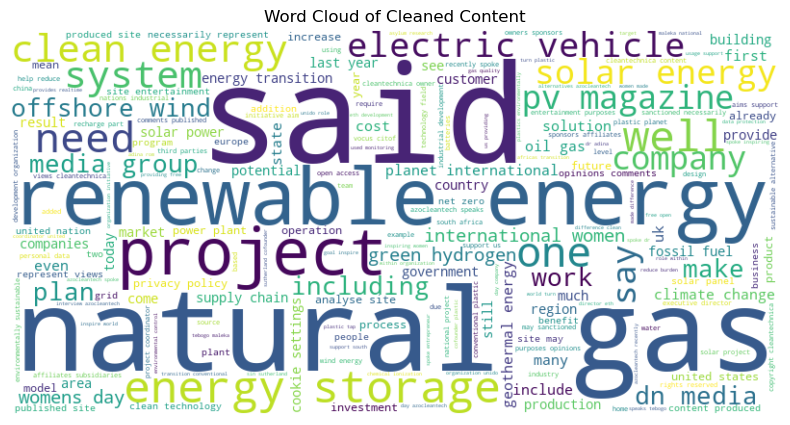

In [32]:
# Combine all cleaned content into a single string
text = ' '.join(data['content_cleaned'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Cleaned Content')
plt.show()

The word cloud highlights the central themes in the dataset, with terms like **"energy," "renewable,"** and **"natural gas"** being the most prominent. This indicates a strong focus on energy-related topics, particularly renewable energy initiatives. Other significant words, such as **"project"** and **"said,"** suggest frequent discussions around specific projects and stakeholder commentary. The presence of terms like **"electric vehicle"** and **"solar"** points to technological innovations in the cleantech sector. Overall, the word cloud reveals key areas of interest and current trends within the energy landscape, emphasizing the dataset's relevance to ongoing discussions in the field.

### N-Gram Analysis

N-gram analysis is a useful technique for examining the frequency of contiguous sequences of words (or characters) in a text corpus.

<Figure size 1200x600 with 0 Axes>

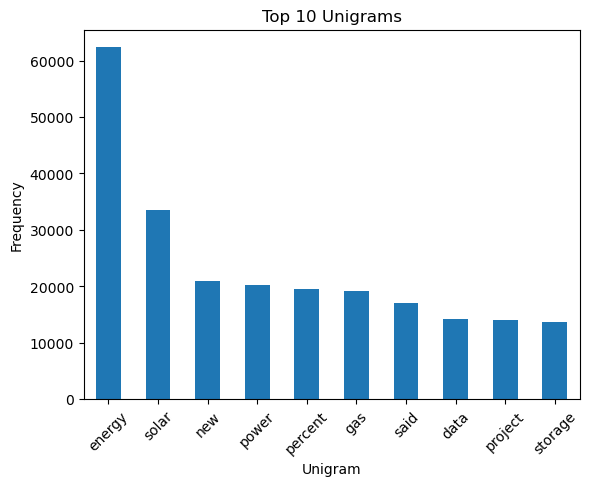

<Figure size 1200x600 with 0 Axes>

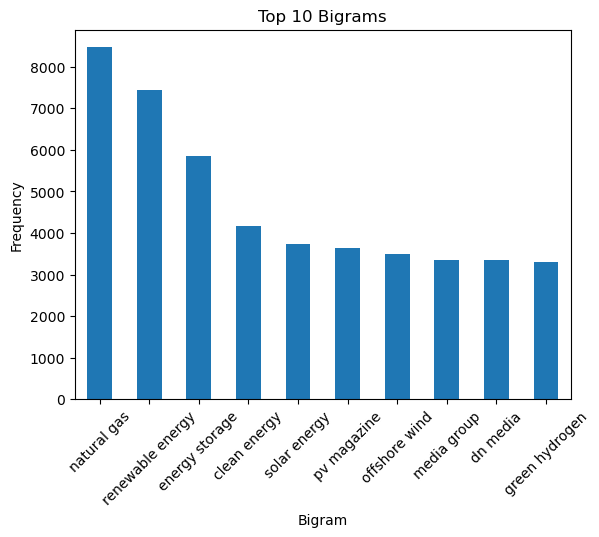

<Figure size 1200x600 with 0 Axes>

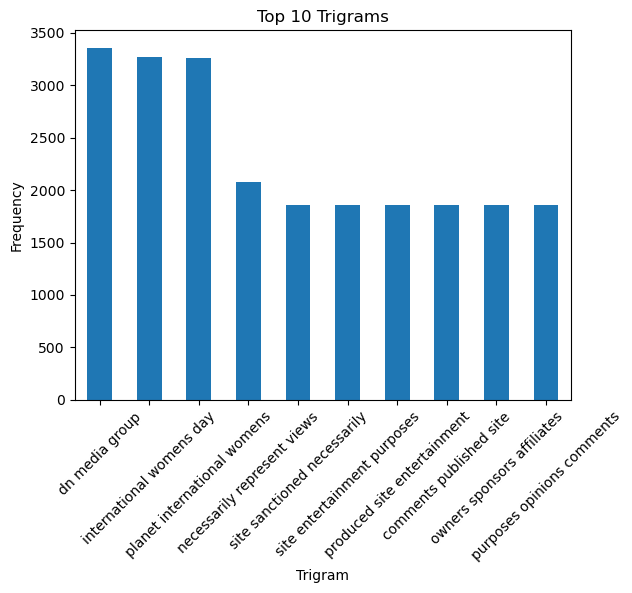

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Initialize CountVectorizer for n-grams
def generate_ngrams(data, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(data['content_cleaned'])
    ngram_freq = ngrams.sum(axis=0)
    ngrams_df = pd.DataFrame(ngram_freq, columns=vectorizer.get_feature_names_out())
    return ngrams_df.T.sort_values(by=0, ascending=False)

# Step 2: Generate n-grams (1-grams, 2-grams, etc.)
unigrams = generate_ngrams(data, 1)
bigrams = generate_ngrams(data, 2)
trigrams = generate_ngrams(data, 3)

# Step 3: Plot the Most Common Unigrams
plt.figure(figsize=(12, 6))
unigrams.head(10).plot(kind='bar', legend=False)
plt.title('Top 10 Unigrams')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Step 4: Plot the Most Common Bigrams
plt.figure(figsize=(12, 6))
bigrams.head(10).plot(kind='bar', legend=False)
plt.title('Top 10 Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Step 4: Plot the Most Common Bigrams
plt.figure(figsize=(12, 6))
trigrams.head(10).plot(kind='bar', legend=False)
plt.title('Top 10 Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Topic Modeling (Using LDA)

To analyze topics, we can use the Latent Dirichlet Allocation (LDA) model.

In [30]:
from gensim import corpora
from gensim.models import LdaModel

data['content_tokenized'] = data['content_tokenized'].apply(lambda x: x if isinstance(x, list) else eval(x))
dictionary = corpora.Dictionary(data['content_tokenized'].tolist())
corpus = [dictionary.doc2bow(tokens) for tokens in data['content_tokenized'].tolist()]
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

Topic 0: 0.029*"solar" + 0.024*"energy" + 0.009*"power" + 0.008*"pv" + 0.008*"storage" + 0.007*"data" + 0.005*"project" + 0.005*"new" + 0.005*"projects" + 0.005*"website"
Topic 1: 0.024*"energy" + 0.011*"geothermal" + 0.011*"hydrogen" + 0.009*"wind" + 0.007*"green" + 0.006*"said" + 0.006*"power" + 0.006*"group" + 0.006*"project" + 0.006*"new"
Topic 2: 0.008*"azocleantech" + 0.006*"research" + 0.006*"spoke" + 0.006*"technology" + 0.005*"development" + 0.005*"plastic" + 0.005*"international" + 0.005*"support" + 0.005*"used" + 0.005*"day"
Topic 3: 0.021*"gas" + 0.011*"natural" + 0.011*"percent" + 0.009*"said" + 0.008*"per" + 0.008*"year" + 0.006*"energy" + 0.006*"prices" + 0.005*"ngi" + 0.005*"oil"
Topic 4: 0.008*"electric" + 0.006*"new" + 0.006*"cleantechnica" + 0.005*"energy" + 0.005*"one" + 0.005*"ev" + 0.005*"percent" + 0.005*"get" + 0.005*"us" + 0.005*"tesla"


**Topic 0: Solar and Energy Storage**
- **Keywords**: "solar," "energy," "power," "pv," "storage"
- **Interpretation**: This topic likely revolves around solar energy technologies, particularly photovoltaic (PV) systems and energy storage solutions. The presence of terms like "data," "project," and "website" may suggest discussions about specific projects, research, or platforms related to solar energy.

**Topic 1: Renewable Energy Sources**
- **Keywords**: "energy," "geothermal," "hydrogen," "wind," "green"
- **Interpretation**: This topic encompasses various renewable energy sources, including geothermal, hydrogen, and wind energy. The emphasis on "green" indicates a focus on sustainable practices. The term "said" suggests that quotes or statements from experts or stakeholders might be common in this context, possibly discussing developments in renewable energy projects.

**Topic 2: Research and Innovation**
- **Keywords**: "azocleantech," "research," "spoke," "technology," "development"
- **Interpretation**: This topic seems to focus on research initiatives, technological advancements, and possibly organizations like Azocleantech. Words like "development" and "support" imply discussions around innovation in clean technology and the role of research in driving these initiatives forward.

**Topic 3: Natural Gas and Energy Prices**
- **Keywords**: "gas," "natural," "percent," "energy," "prices"
- **Interpretation**: This topic appears to discuss the natural gas sector, with a focus on pricing and market dynamics. The presence of terms like "year" and "percent" suggests that statistical data or trends over time might be included, potentially analyzing the impact of natural gas prices on energy markets.

**Topic 4: Electric Vehicles and Cleantech**
- **Keywords**: "electric," "new," "cleantechnica," "energy," "ev"
- **Interpretation**: This topic is likely centered around electric vehicles (EVs) and the broader cleantech ecosystem. Words like "tesla" indicate discussions about prominent EV manufacturers or innovations in electric mobility. The mention of "percent" suggests a focus on market share or growth metrics in the electric vehicle space.